In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import h5py
h5py.enable_ipython_completer()

/cosma/local/Python/2.7.15/lib/python2.7/site-packages/h5py/__init__.py:75: UserWarning: h5py is running against HDF5 1.10.3 when it was built against 1.8.4, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [5]:
filename = '/cosma7/data/Eagle/ScienceRuns/Planck1/L0012N0188/PE/REFERENCE/data/groups_028_z000p000/eagle_subfind_tab_028_z000p000.0.hdf5'

In [6]:
myfile = h5py.File(filename, 'r')

In [7]:
for i in myfile['Subhalo']:
    print(i)

ApertureMeasurements
BlackHoleMass
BlackHoleMassAccretionRate
CentreOfMass
CentreOfPotential
GasSpin
GroupNumber
HalfMassProjRad
HalfMassRad
IDMostBound
InertiaTensor
InitialMassWeightedBirthZ
InitialMassWeightedStellarAge
KineticEnergy
Mass
MassTwiceHalfMassRad
MassType
NSF
SF
StarFormationRate
Stars
StellarInitialMass
StellarVelDisp
StellarVelDisp_HalfMassProjRad
SubGroupNumber
SubLength
SubLengthType
SubOffset
ThermalEnergy
TotalEnergy
Velocity
Vmax
VmaxRadius


In [8]:
for i in myfile['FOF']:
    print(i)

ContaminationCount
ContaminationMass
FirstSubhaloID
GroupCentreOfPotential
GroupLength
GroupMass
GroupOffset
Group_M_Crit200
Group_M_Crit2500
Group_M_Crit500
Group_M_Mean200
Group_M_Mean2500
Group_M_Mean500
Group_M_TopHat200
Group_R_Crit200
Group_R_Crit2500
Group_R_Crit500
Group_R_Mean200
Group_R_Mean2500
Group_R_Mean500
Group_R_TopHat200
NumOfSubhalos


In [9]:
for i in myfile['Header'].attrs:
    print(i)

BoxSize
E(z)
ExpansionFactor
Flag_Cooling
Flag_DoublePrecision
Flag_Feedback
Flag_IC_Info
Flag_Metals
Flag_Sfr
Flag_StellarAge
H(z)
HubbleParam
MassTable
NTask
Ngroups
Nids
Nsubgroups
NumFilesPerSnapshot
NumPart_ThisFile
NumPart_Total
NumPart_Total_HighWord
Omega0
OmegaBaryon
OmegaLambda
Redshift
RunLabel
SendOffSetTask
Time
TotNgroups
TotNids
TotNsubgroups


In [21]:
myfile = h5py.File('/cosma7/data/Eagle/ScienceRuns/Planck1/L0012N0188/PE/REFERENCE/data/groups_028_z000p000/eagle_subfind_tab_028_z000p000.0.hdf5', 'r')
generic_name = '/cosma7/data/Eagle/ScienceRuns/Planck1/L0012N0188/PE/REFERENCE/data/groups_028_z000p000/eagle_subfind_tab_028_z000p000.'
NumFilesPerSnapshot = myfile['Header'].attrs['NumFilesPerSnapshot']
myfile.close()


FirstSubhaloID = []
Pos = []
SFR = []
M200 = []
MassType = []
centrepot = []

for i in range(NumFilesPerSnapshot):
    filename = generic_name + '%d.hdf5'%i
    myfile = h5py.File(filename, 'r')
    
    FirstSubhaloID.extend(myfile['FOF/FirstSubhaloID'][()])
    Pos.append(myfile['Subhalo/CentreOfMass'][()])
    SFR.extend(myfile['Subhalo/StarFormationRate'][()])
    M200.extend(myfile['FOF/Group_M_Crit200'][()]* 1e10) 
    MassType.append(myfile['Subhalo/MassType'][()] * 1e10)
    centrepot.append(myfile['Subhalo/CentreOfPotential'][()])
    
    myfile.close()


In [23]:
Pos = np.vstack(Pos)
MassType = np.vstack(MassType)
SFR = np.asarray(SFR)
M200 = np.asarray(M200)
centrepot = np.vstack(centrepot)

In [12]:
np.shape(MassType)
#0 = Gas mass
#1 = Dark matter mass
#4 = Stellar mass
#5 = Black holes

(4948, 6)

In [13]:
np.shape(Pos)

(4948, 3)

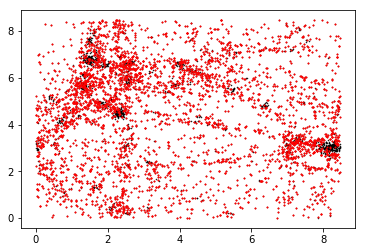

In [14]:
plt.plot(Pos[:,0], Pos[:,1],'k.', ms=1)
plt.plot(Pos[FirstSubhaloID,0], Pos[FirstSubhaloID,1],'ro', ms=1)

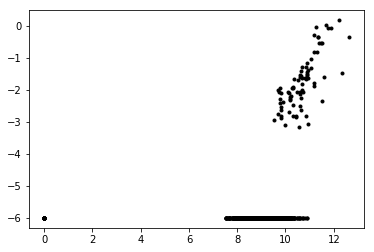

In [15]:
plt.plot(np.log10(M200+1), np.log10(SFR[FirstSubhaloID]+1e-6), 'k.')

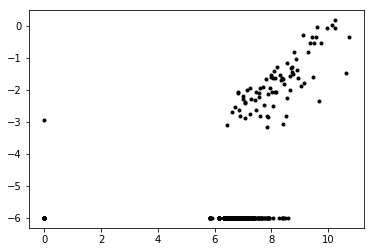

In [16]:
plt.plot(np.log10(MassType[FirstSubhaloID, 4]+1), np.log10(SFR[FirstSubhaloID]+1e-6), 'k.')

/cosma/local/Python/2.7.15/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


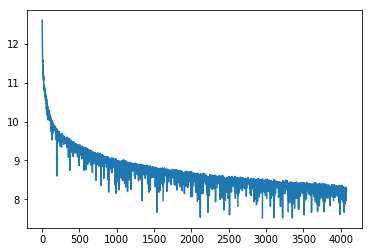

In [17]:
plt.plot(np.log10(M200))

In [18]:
FirstSubhaloID = myfile['FOF/FirstSubhaloID'][()]

ValueError: Not a location (invalid object ID)

In [ ]:
FirstSubhaloID

In [ ]:
SubhaloMass = myfile['Subhalo/Mass'][()]
len(SubhaloMass)

In [30]:
print(np.max(Pos[:,2]))/12

0.7059136231740316


In [31]:
print(np.max(centrepot[0])/12)

0.6826748847961426
